## Import Libraries and Load Data
We’ll start by importing the necessary libraries and loading the dataset to get a sense of the data we’re working with.This code imports libraries essential for building a hybrid recommendation system for Movies.`pandas` and `numpy` handle data manipulation and numerical computations.`sklearn.metrics.pairwise` provides cosine similarity for item comparisons.The TfidfVectorizer from sklearn.feature_extraction.text in Python is a tool used to convert a collection of text documents into a matrix of numerical features based on the TF-IDF (Term Frequency-Inverse Document Frequency) statistic.The command import matplotlib.pyplot as plt is used to import the pyplot module from the matplotlib library in Python. This module provides an interface for creating various types of visualizations and is widely used in data science and machine learning for exploratory data analysis (EDA) and result presentation.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



# Load dataset
file_path = 'movie_dataset.csv'
movies = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset head:")
print(movies.head())
print("\nDataset columns:")
print(movies.columns)


Dataset head:
   index     budget                                    genres  \
0      0  237000000  Action Adventure Fantasy Science Fiction   
1      1  300000000                  Adventure Fantasy Action   
2      2  245000000                    Action Adventure Crime   
3      3  250000000               Action Crime Drama Thriller   
4      4  260000000          Action Adventure Science Fiction   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  culture clash future space war space colony so...                en   
1  ocean drug abuse exotic island east india trad...                en   
2         spy base

##  Explore the Dataset
Here, we’ll take a closer look at the dataset's structure and identify the columns that we can use for recommendations. Common columns in movie datasets include title, genres, and plot keywords.This helps us to know the data better and use methods for analysis

In [4]:
# Check for any missing values and data types
print("\nDataset info:")
print(movies.info())

# Display unique values in important columns (e.g., 'genres', 'title')
print("\nUnique genres:")
print(movies['genres'].unique())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken

## Preprocess the Data
Since we’ll use content-based filtering (i.e., finding similar movies based on metadata), we’ll preprocess the genres and any other textual columns we can use to describe a movie. We’ll use TF-IDF (Term Frequency-Inverse Document Frequency) for this purpose.TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical measure used in natural language processing (NLP) to evaluate the importance of a word in a document relative to a collection (corpus).

Combine Relevant Text Columns
If there are multiple relevant columns (e.g., genres, keywords), we’ll combine them into a single "metadata" column for simplicity.

In [6]:
# Fill missing values in the 'genres' and 'keywords' columns
movies['genres'] = movies['genres'].fillna('')
movies['keywords'] = movies['keywords'].fillna('')

# Combine genres and keywords into a single metadata string for each movie
movies['metadata'] = movies['genres'] + ' ' + movies['keywords']

# Display an example of the metadata for a few movies
print("\nSample metadata:")
print(movies[['title', 'metadata']].head())



Sample metadata:
                                      title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            metadata  
0  Action Adventure Fantasy Science Fiction cultu...  
1  Adventure Fantasy Action ocean drug abuse exot...  
2  Action Adventure Crime spy based on novel secr...  
3  Action Crime Drama Thriller dc comics crime fi...  
4  Action Adventure Science Fiction based on nove...  


## Convert Text Data to Numerical Features
Using TF-IDF Vectorization to convert the text-based metadata into a numerical form. This transformation helps to measure similarity between movies based on shared metadata.

In [8]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the 'metadata' column
tfidf_matrix = tfidf_vectorizer.fit_transform(movies['metadata'])

print("\nTF-IDF matrix shape:", tfidf_matrix.shape)



TF-IDF matrix shape: (4803, 4279)


In [9]:
print("\nTF-IDF matrix :", tfidf_matrix)


TF-IDF matrix :   (0, 36)	0.1204052265949345
  (0, 56)	0.13915944291160764
  (0, 1357)	0.17010339739656694
  (0, 3312)	0.15868810297127478
  (0, 1398)	0.15887388882624087
  (0, 950)	0.3273501473244156
  (0, 732)	0.34750081373035463
  (0, 1509)	0.2807203434078145
  (0, 3523)	0.5333881013205907
  (0, 4141)	0.19659117722675792
  (0, 784)	0.38194860547956394
  (0, 3493)	0.3332036883870844
  (1, 36)	0.11465612911110766
  (1, 56)	0.1325148708633746
  (1, 1357)	0.1619813163074048
  (1, 2618)	0.306733708435379
  (1, 1154)	0.23349577823196696
  (1, 25)	0.2802500596091054
  (1, 1303)	0.3203481759766464
  (1, 1949)	0.2624333717984598
  (1, 1191)	0.31442486788661606
  (1, 1869)	0.32361324286605214
  (1, 3885)	0.3828998735070375
  (1, 812)	0.3203481759766464
  (1, 2210)	0.1987206485956431
  :	:
  (4798, 620)	0.28273462179736947
  (4798, 4025)	0.3007860791693974
  (4798, 1637)	0.3069425747697985
  (4798, 3588)	0.3231361079866573
  (4798, 3987)	0.3231361079866573
  (4798, 2701)	0.35081913586775243
 

## Calculate Similarity Matrix
We’ll calculate the cosine similarity between the TF-IDF vectors. This similarity score will be used to recommend movies similar to a given input.

In [11]:
# Calculate cosine similarity matrix
cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Display shape of the similarity matrix
print("\nCosine similarity matrix shape:", cosine_sim_matrix.shape)



Cosine similarity matrix shape: (4803, 4803)


In [12]:
print("\nCosine similarity matrix:", cosine_sim_matrix)


Cosine similarity matrix: [[1.         0.05979947 0.04399798 ... 0.         0.         0.        ]
 [0.05979947 1.         0.04189717 ... 0.04688077 0.         0.        ]
 [0.04399798 0.04189717 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.04688077 0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


## Build a Recommendation Function
With the similarity matrix, we can create a function to recommend movies. This function will take a movie title as input, find its index, retrieve similar movies based on similarity scores, and return the top recommendations.

In [14]:
# Create a function to get movie recommendations based on cosine similarity
def get_movie_recommendations(title, cosine_sim=cosine_sim_matrix):
    # Get the index of the movie that matches the title
    idx = movies.index[movies['title'] == title].tolist()[0]
    
    # Get pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort movies based on similarity scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get indices of the top 10 most similar movies (excluding itself)
    movie_indices = [i[0] for i in sim_scores[1:11]]
    
    # Return the titles of the top recommended movies
    return movies['title'].iloc[movie_indices]

# Example usage of the recommendation function
print("\nRecommendations for 'Toy Story':")
print(get_movie_recommendations('Toy Story')[:4])



Recommendations for 'Toy Story':
42                 Toy Story 3
1983          Meet the Deedles
2182    Pooh's Heffalump Movie
3038     Hey Arnold! The Movie
Name: title, dtype: object


## Test the Recommendation System with User Input
We’ll wrap the function to allow a user to input a movie title interactively.

In [16]:
# Ask for user input to recommend movies
user_input = input("Enter a movie title to get recommendations: ")

# Check if the movie exists in the dataset
if user_input in movies['title'].values:
    print(f"\nMovies recommended for '{user_input}':")
    recommendations = get_movie_recommendations(user_input)[:4]
    for idx, title in enumerate(recommendations, start=1):
        print(f"{idx}. {title}")
else:
    print("Sorry, this movie is not in the dataset.")


Enter a movie title to get recommendations:  Toy Story 3



Movies recommended for 'Toy Story 3':
1. Meet the Deedles
2. Pooh's Heffalump Movie
3. Hey Arnold! The Movie
4. Dwegons


In [17]:
movies[movies.title==user_input]

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,metadata
42,42,200000000,Animation Family Comedy,http://disney.go.com/toystory/,10193,hostage college toy barbie animation,en,Toy Story 3,"Woody, Buzz, and the rest of Andy's toys haven...",59.995418,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,No toy gets left behind.,Toy Story 3,7.6,4597,Tom Hanks Tim Allen Ned Beatty Joan Cusack Mic...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Lee Unkrich,Animation Family Comedy hostage college toy ba...


In [18]:
movies[movies.title==user_input].values

array([[42, 200000000, 'Animation Family Comedy',
        'http://disney.go.com/toystory/', 10193,
        'hostage college toy barbie animation', 'en', 'Toy Story 3',
        "Woody, Buzz, and the rest of Andy's toys haven't been played with in years. With Andy about to go to college, the gang find themselves accidentally left at a nefarious day care center. The toys must band together to escape and return home to Andy.",
        59.99541800000001,
        '[{"name": "Walt Disney Pictures", "id": 2}, {"name": "Pixar Animation Studios", "id": 3}]',
        '[{"iso_3166_1": "US", "name": "United States of America"}]',
        '2010-06-16', 1066969703, 103.0,
        '[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\\u00f1ol"}]',
        'Released', 'No toy gets left behind.', 'Toy Story 3', 7.6, 4597,
        'Tom Hanks Tim Allen Ned Beatty Joan Cusack Michael Keaton',
        '[{\'name\': \'Andrew Stanton\', \'gender\': 2, \'department\': \'Writing\', \'job\':

## Visualize the Most Popular Genres
Let's start by examining the most common movie genres. This can help us understand which genres are most represented in the dataset.

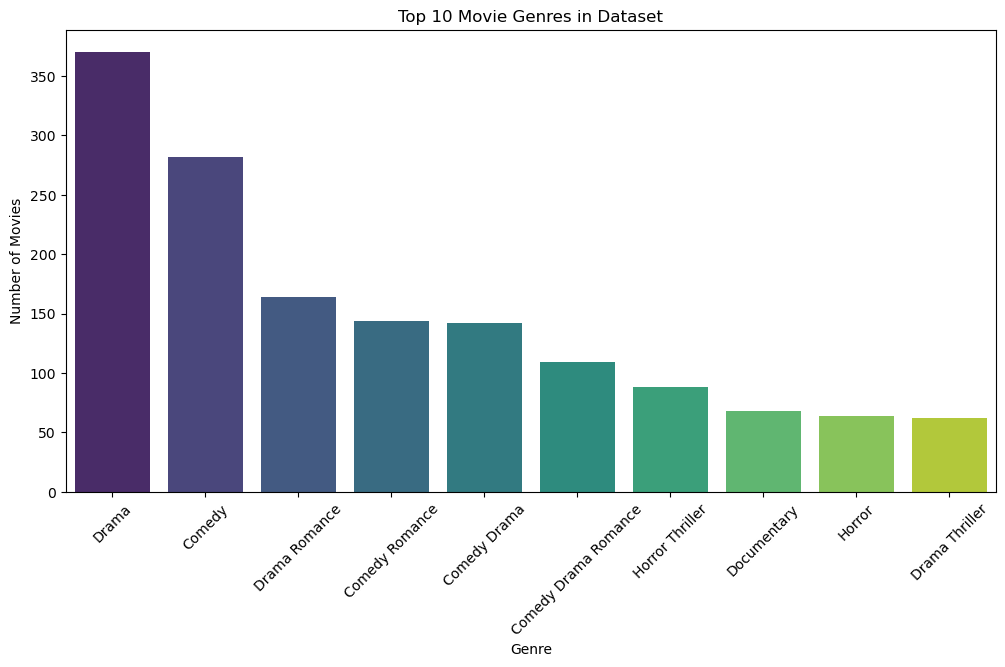

In [20]:
# Split the genres for each movie and count occurrences
genre_data = movies['genres'].str.get_dummies(sep='|').sum().sort_values(ascending=False)

# Plot top 10 genres
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_data.index[:10], y=genre_data.values[:10], palette="viridis")
plt.title("Top 10 Movie Genres in Dataset")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.show()


## Visualize Similarity Scores for a Movie
For a given movie, let’s visualize its similarity scores with other movies. This helps us see how the recommendation model perceives similarity across movies.

Visualize the Top Similar Movies for a Given Movie
We’ll use the similarity scores generated in our cosine similarity matrix and plot the top recommended movies for a specific input movie.

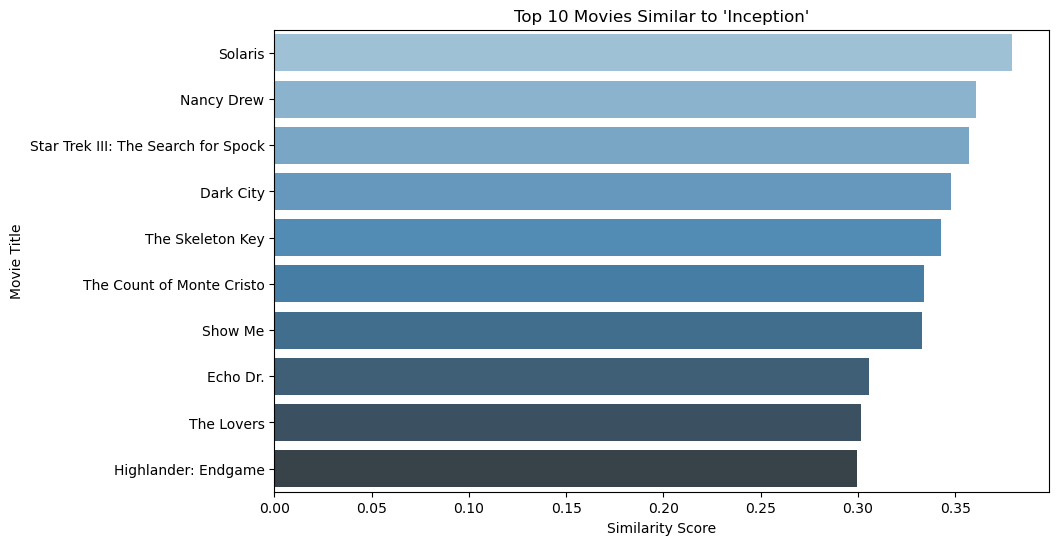

In [22]:
# Define a function to plot similarity scores of recommended movies
def plot_similar_movies(movie_title, cosine_sim=cosine_sim_matrix, top_n=10):
    # Get the index of the movie that matches the title
    idx = movies.index[movies['title'] == movie_title].tolist()[0]
    
    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Select top similar movies (excluding the movie itself)
    top_similar_movies = sim_scores[1:top_n + 1]
    
    # Extract movie titles and similarity scores
    movie_indices = [i[0] for i in top_similar_movies]
    movie_titles = movies['title'].iloc[movie_indices]
    scores = [score[1] for score in top_similar_movies]

    # Plot similarity scores
    plt.figure(figsize=(10, 6))
    sns.barplot(x=scores, y=movie_titles, palette="Blues_d")
    plt.title(f"Top {top_n} Movies Similar to '{movie_title}'")
    plt.xlabel("Similarity Score")
    plt.ylabel("Movie Title")
    plt.show()

# Example: Visualize top similar movies for 'Toy Story'
plot_similar_movies('Inception')


## Plot Similarities for a Specific Movie
To visualize the similarity scores for a particular movie, we can select that row in the matrix and plot it. For instance, if we want to see how similar other movies are to "Toy Story," we’ll select the similarity row corresponding to "Toy Story."

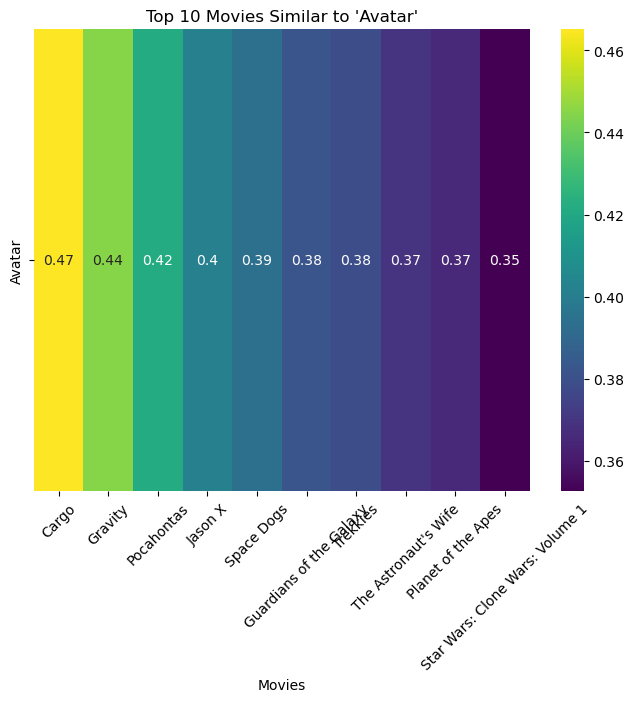

In [24]:
# Choose a movie title
movie_title = "Avatar"

# Get the index of the movie
movie_idx = movies[movies['title'] == movie_title].index[0]

# Extract similarity scores for the chosen movie
similarity_scores = cosine_sim_matrix[movie_idx]

# Plot the similarity scores as a heatmap (e.g., top 10 most similar movies)
top_n = 10
top_movie_indices = similarity_scores.argsort()[::-1][1:top_n+1]  # Exclude the movie itself

plt.figure(figsize=(8, 6))
sns.heatmap(similarity_scores[top_movie_indices].reshape(1, -1), annot=True, cmap="viridis", 
            xticklabels=movies['title'].iloc[top_movie_indices], yticklabels=[movie_title])
plt.title(f"Top {top_n} Movies Similar to '{movie_title}'")
plt.xlabel("Movies")
plt.xticks(rotation=45)
plt.show()
